# 以文生圖(Image generation) 測試

## 載入套件

In [1]:
import os
import openai
import requests
import os, json

# 以文生圖

In [3]:
prompt = 'a white siamese cat'
response = openai.Image.create(
  prompt=prompt,
  n=1,
  size="512x512"
)
image_url = response['data'][0]['url']
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-8b5wOBmK82BeorSFOMxwOTtc/user-plUWnt8WnVXuiz1Dp90n2CVi/img-lH4pecrkb7dK96sCQKaYjP8l.png?st=2023-03-08T06%3A07%3A31Z&se=2023-03-08T08%3A07%3A31Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-03-07T21%3A42%3A17Z&ske=2023-03-08T21%3A42%3A17Z&sks=b&skv=2021-08-06&sig=lUWa4G9xO/I3agyXu%2BHhtlNddB%2BiSTKBdKssx/iLhrg%3D'

## 顯示圖片

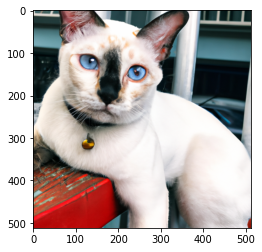

In [9]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img);

### 注意，手及臉部不自然

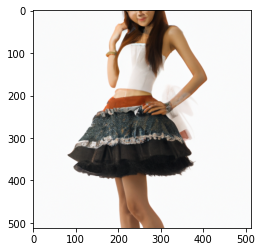

In [31]:
prompt = 'a chinese girl with skirt stands up'
response = openai.Image.create(
  prompt=prompt,
  n=1,
  size="512x512"
)
image_url = response['data'][0]['url']
img = show_image(image_url)
img.save('girl.png')

### 顯示圖片的函數

In [30]:
def show_image(url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    plt.axis('off')
    plt.imshow(img)
    return img

## 產生相關圖片(variance)

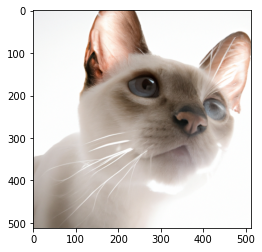

In [34]:
prompt = 'a close up, studio photographic portrait of ' + \
         'a white siamese cat that looks curious, backlit ears'
response = openai.Image.create(
  prompt=prompt,
  n=1,
  size="512x512"
)
image_url = response['data'][0]['url']
img = show_image(image_url)
img.save('cat.png')

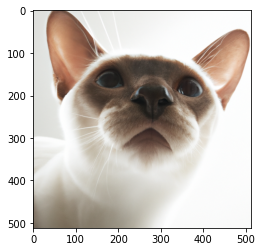

In [36]:
response = openai.Image.create_variation(
  image=open("cat.png", "rb"),
  n=1,
  size="512x512"
)
image_url = response['data'][0]['url']
show_image(image_url);

# 修復(Inpainting)

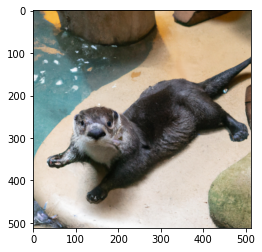

In [22]:
response = openai.Image.create_edit(
  image=open("otter1.png", "rb"),
  mask=open("otter_mask.png", "rb"),
  prompt="otter",
  n=1,
  size="512x512"
)
image_url = response['data'][0]['url']
img = show_image(image_url)
img.save('otter1_edited.png')

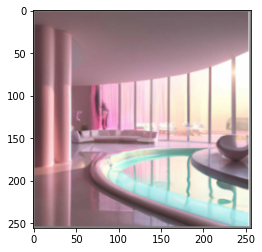

In [25]:
# 無效，圖片過小?
response = openai.Image.create_edit(
  image=open("image_edit_original1.png", "rb"),
  mask=open("image_edit_mask1.png", "rb"),
  prompt="A sunlit indoor lounge area with a pool containing a flamingo",
  n=1,
  size="256x256"
)
image_url = response['data'][0]['url']
show_image(image_url)